In [81]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [84]:
demand = pd.read_excel('../dataset/a6_booster_delivery_planning.xlsx')
events = pd.read_excel('../dataset/ariane_tracks_booster_container_1.0.xlsx')

states = ['A','B','C','D','E']
containers = ['SN'+str(i) for i in range(1,9)]
events['Entry'] = events['Entry'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))
events['Exit'] = events['Exit'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))


def days_spent_for_container(container):
    return({state:[(row[3] - row[2]).days for row in events.loc[(events['Container'] == container) & (events['Zone'] == state)].values] for state in states})

## I.   Data viz

In [85]:
print("demand shape :", demand.shape)
demand.head(25)

demand shape : (39, 2)


,Date,Config
0,2021-01-12,2
1,2021-08-24,4
2,2021-10-19,2
3,2022-01-28,2
4,2022-06-21,4
5,2022-10-29,4
6,2022-11-20,2
7,2023-02-27,2
8,2023-05-17,4
9,2023-07-05,2


In [86]:
print("events shape :", events.shape)
events.head()

events shape : (368, 4)


,Container,Zone,Entry,Exit
0,SN7,A,2020-12-09,2020-12-24
1,SN7,B,2020-12-24,2020-12-29
2,SN7,C,2020-12-29,2020-12-30
3,SN7,D,2021-01-10,2021-01-12
4,SN7,E,2021-01-12,2021-01-27


In [74]:
for row in events.loc[(events['Container'] == 'SN1') & (events['Zone'] == 'A')].values:
    print(row[2])
    print(row[3])

2021-09-15 00:00:00
2021-09-30 00:00:00
2022-09-26 00:00:00
2022-10-11 00:00:00
2023-04-14 00:00:00
2023-04-29 00:00:00
2023-07-21 00:00:00
2023-08-05 00:00:00
2024-02-19 00:00:00
2024-03-05 00:00:00


## II.  spent delay

In [87]:
duration_time_at_states = {
    container:days_spent_for_container(container) for container in containers
}

In [122]:
duration_time_at_states['SN3']

{'A': [15, 15, 15, 15, 15],
 'B': [5, 5, 5, 5, 5, 5, 5, 5, 5],
 'C': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'D': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'E': [15, 15, 15, 15, 15]}

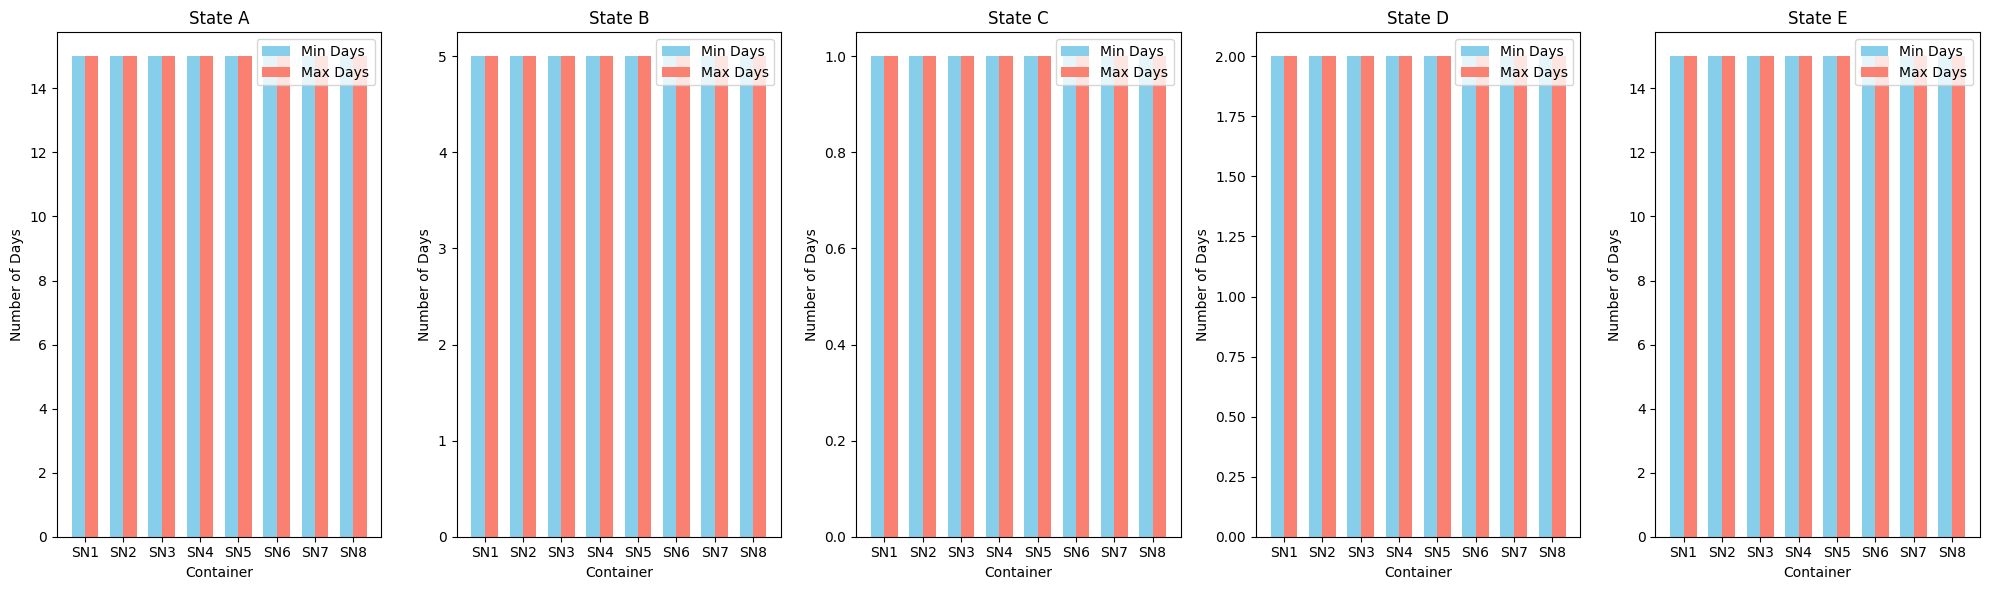

In [92]:
fig, axs = plt.subplots(1, len(states), figsize=(20, 6))

# Plot each state's data
for i, state in enumerate(states):
    ax = axs[i]
    min_days = []
    max_days = []
    for container in containers:
        min_days.append(min(duration_time_at_states[container][state]))
        max_days.append(max(duration_time_at_states[container][state]))
    ind = np.arange(len(containers))
    width = 0.35
    ax.bar(ind, min_days, width, label='Min Days', color='skyblue')
    ax.bar(ind + width, max_days, width, label='Max Days', color='salmon')
    ax.set_title(f'State {state}')
    ax.set_xlabel('Container')
    ax.set_ylabel('Number of Days')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(containers)
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## III.    correction algorithm

In [163]:
sorted_events = events.sort_values(['Exit'])
sorted_events.head(60)

,Container,Zone,Entry,Exit
0,SN7,A,2020-12-09,2020-12-24
8,SN3,A,2020-12-09,2020-12-24
1,SN7,B,2020-12-24,2020-12-29
9,SN3,B,2020-12-24,2020-12-29
2,SN7,C,2020-12-29,2020-12-30
10,SN3,C,2020-12-29,2020-12-30
3,SN7,D,2021-01-10,2021-01-12
11,SN3,D,2021-01-10,2021-01-12
4,SN7,E,2021-01-12,2021-01-27
12,SN3,E,2021-01-12,2021-01-27


In [128]:
dates_of_exit = list(sorted_events['Exit'].unique())
print(dates_of_exit[0])
sorted_events.loc[sorted_events['Exit'] == dates_of_exit[0]].head()

2020-12-24 00:00:00


,Container,Zone,Entry,Exit
0,SN7,A,2020-12-09,2020-12-24
8,SN3,A,2020-12-09,2020-12-24


In [143]:
sorted_events.loc[sorted_events['Exit'] == dates_of_exit[0]]['Zone'].nunique()

1

In [159]:


def extract_information():
    dates_of_exit = list(sorted_events['Exit'].unique())
    cycles = []
    cycle = []
    for i,date in enumerate(dates_of_exit):
        df = sorted_events.loc[sorted_events['Exit'] == date]

        if df['Zone'].nunique() != 1:
            print("Error, at the same time at two points of space")
            print(df.head())
            #break
        #TODO : check if other problems i haven't thought
    
        if df['Zone'].iloc[0] == 'A' and cycle!=[]:
            if i!=0 and i!=len(dates_of_exit)-1:
                shipping = list(df['Container'])

                
                entry_ = df['Entry'].iloc[0]

            cycles.append(cycle)
            cycle = []

        shipping = list(df['Container'])
        zone_ = df['Zone'].iloc[0]
        entry_ = df['Entry'].iloc[0]
        cycle.append({'zone':zone_, 'containers':shipping, 'Entry':entry_, 'Exit':date})

    return(cycles)
dic = extract_information()

Error, at the same time at two points of space
    Container Zone      Entry       Exit
267       SN4    E 2023-09-24 2023-10-09
271       SN6    A 2023-09-24 2023-10-09
279       SN3    A 2023-09-24 2023-10-09
259       SN5    E 2023-09-24 2023-10-09


In [160]:
print(dic[0])
print(dic[1])
print(dic[2])

[{'zone': 'A', 'containers': ['SN7', 'SN3'], 'Entry': Timestamp('2020-12-09 00:00:00'), 'Exit': Timestamp('2020-12-24 00:00:00')}, {'zone': 'B', 'containers': ['SN7', 'SN3'], 'Entry': Timestamp('2020-12-24 00:00:00'), 'Exit': Timestamp('2020-12-29 00:00:00')}, {'zone': 'C', 'containers': ['SN7', 'SN3'], 'Entry': Timestamp('2020-12-29 00:00:00'), 'Exit': Timestamp('2020-12-30 00:00:00')}, {'zone': 'D', 'containers': ['SN7', 'SN3'], 'Entry': Timestamp('2021-01-10 00:00:00'), 'Exit': Timestamp('2021-01-12 00:00:00')}, {'zone': 'E', 'containers': ['SN7', 'SN3'], 'Entry': Timestamp('2021-01-12 00:00:00'), 'Exit': Timestamp('2021-01-27 00:00:00')}, {'zone': 'D', 'containers': ['SN3', 'SN7'], 'Entry': Timestamp('2021-01-27 00:00:00'), 'Exit': Timestamp('2021-01-29 00:00:00')}, {'zone': 'C', 'containers': ['SN7', 'SN3'], 'Entry': Timestamp('2021-02-08 00:00:00'), 'Exit': Timestamp('2021-02-09 00:00:00')}, {'zone': 'B', 'containers': ['SN7'], 'Entry': Timestamp('2021-02-09 00:00:00'), 'Exit': T

In [162]:
print(dic[-1])

[{'zone': 'A', 'containers': ['SN7', 'SN8', 'SN1', 'SN6'], 'Entry': Timestamp('2024-02-19 00:00:00'), 'Exit': Timestamp('2024-03-05 00:00:00')}, {'zone': 'B', 'containers': ['SN6', 'SN1', 'SN8', 'SN7'], 'Entry': Timestamp('2024-03-05 00:00:00'), 'Exit': Timestamp('2024-03-10 00:00:00')}, {'zone': 'C', 'containers': ['SN6', 'SN8', 'SN7', 'SN1'], 'Entry': Timestamp('2024-03-10 00:00:00'), 'Exit': Timestamp('2024-03-11 00:00:00')}]


In [ ]:
def reconstruct_data(data):
    containers_ = []
    zone